In [163]:
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
baseline_seen = pd.read_pickle("/Users/andrew/school/spring21/11777/group-tars-alfred/tars/results/valid_seen/baseline_valid_seen_andrew_20210401_041308_917614.pkl")

moca_seen = pd.read_pickle("/Users/andrew/school/spring21/11777/group-tars-alfred/tars/results/valid_seen/moca_valid_seen_andrew_20210401_102412_600990.pkl")

baseline_unseen = pd.read_pickle("/Users/andrew/school/spring21/11777/group-tars-alfred/tars/results/valid_unseen/baseline_valid_unseen_andrew_20210401_014614_528924.pkl")

moca_unseen = pd.read_pickle("/Users/andrew/school/spring21/11777/group-tars-alfred/tars/results/valid_unseen/moca_valid_unseen_andrew_20210401_103447_576516.pkl")

dfs = {"baseline seen": baseline_valid_seen, "baseline unseen": baseline_valid_unseen, "MOCA seen": moca_seen, "MOCA unseen": moca_unseen}

In [165]:
def get_nav_obj(df, groupby=None):
    if groupby:
        df = df.groupby(groupby)
    return df['visible_interact_objs'].sum() / df['interact_objs'].sum()

def get_first_nav_obj(df, groupby=None):
    if groupby:
        df = df.groupby(groupby)
    return df['first_interact_obj_success'].mean()

def get_inter_succ(df, groupby=None):
    if groupby:
        df = df.groupby(groupby)
    return df['successful_interactions'].sum() / df['attempted_interactions'].sum()

def get_fail_bad_mask(df, groupby=None):
    if groupby:
        df = df.groupby(groupby)
    return df['bad_mask_interactions'].sum() / (df['attempted_interactions'].sum() - df['successful_interactions'].sum())

def get_unnec_objs(df, groupby=None):
    if groupby:
        df = df.groupby(groupby)
    return df['ui'].sum() / df['interact_objs'].sum()

def get_iapp(df, groupby=None):
    if groupby:
        df = df.groupby(groupby)
    return df['iapp'].mean()

def get_success(df, groupby=None):
    if groupby:
        return df[df['success_spl'] > 0].groupby(groupby).count()['trial'] / df.groupby(groupby).count()['trial']
    else:
        return len(df[df['success_spl'] > 0]) / len(df)

def get_gc_success(df, groupby=None):
    if groupby:
        df = df.groupby(groupby)
    return df['goal_condition_success'].mean()

def display_frac(df, num, denom):
    return "%d/%d = %.3f" % (df[num].sum(), df[denom].sum(), df[num].sum() / df[denom].sum()) 


In [166]:
task_type_labels = ["Examine\nin Light", "Pick &\nPlace", "Stack &\nPlace", "Clean &\nPlace", "Cool &\nPlace", "Heat &\nPlace", "Pick Two\n& Place"]

def plot_metric(metric_fn, x_title, y_title):
    bs = metric_fn(baseline_seen, groupby="type")
    ms = metric_fn(moca_seen, groupby="type")
    bu = metric_fn(baseline_unseen, groupby="type")
    mu = metric_fn(moca_unseen, groupby="type")
    index = baseline_unseen['type'].unique()
    index.sort()
    plot_df = pd.DataFrame({'Seq2Seq Seen': bs, 'Seq2Seq Unseen': bu, 'MOCA Seen': ms, 'MOCA Unseen': mu}, index=index)
    ax = plot_df.plot.bar(figsize=(8, 4), xlabel=x_title, ylabel=y_title)
    ax.set_xticklabels(task_type_labels, rotation="horizontal")

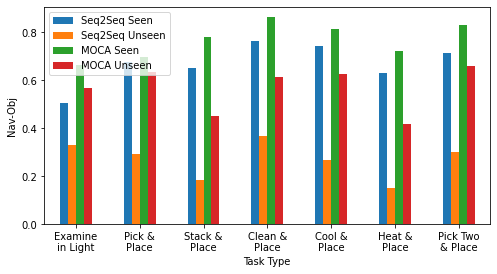

In [167]:
plot_metric(get_nav_obj, "Task Type", "Nav-Obj")

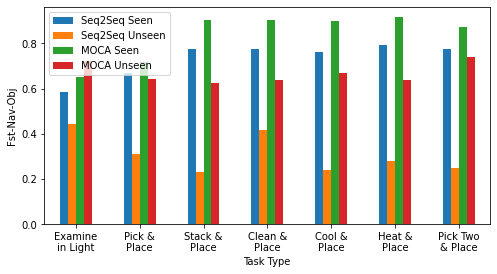

In [168]:
plot_metric(get_first_nav_obj, "Task Type", "Fst-Nav-Obj")

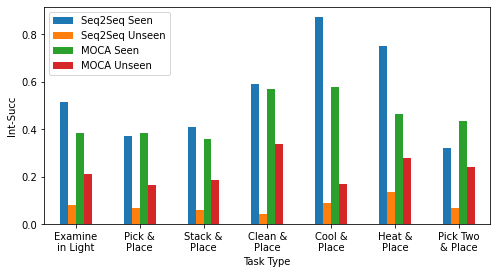

In [169]:
plot_metric(get_inter_succ, "Task Type", "Int-Succ")

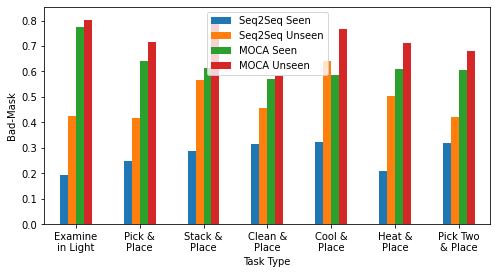

In [170]:
plot_metric(get_fail_bad_mask, "Task Type", "Bad-Mask")

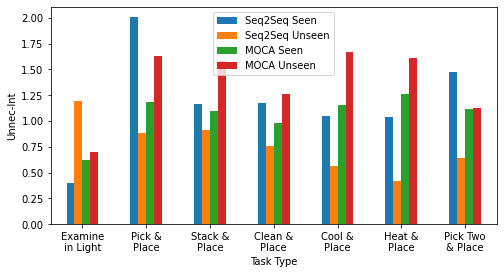

In [171]:
plot_metric(get_unnec_objs, "Task Type", "Unnec-Int")

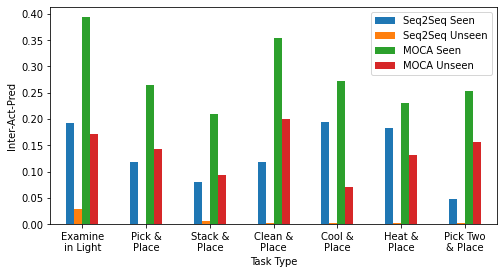

In [172]:
plot_metric(get_iapp, "Task Type", "Inter-Act-Pred")

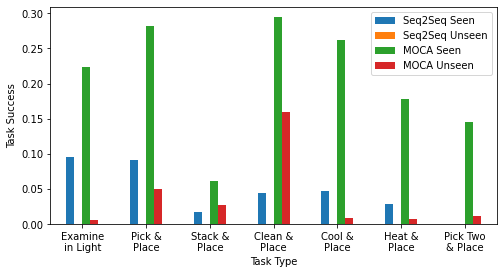

In [173]:
plot_metric(get_success, "Task Type", "Task Success")

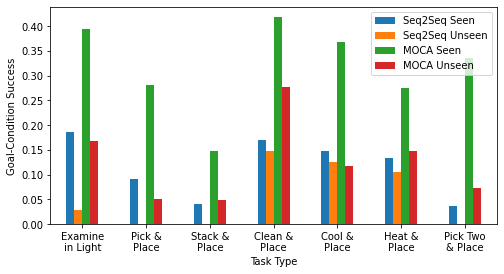

In [174]:
plot_metric(get_gc_success, "Task Type", "Goal-Condition Success")

In [176]:
df = moca_unseen
df[df['success_spl'] > 0].groupby('type').count()['trial']

type
look_at_obj_in_light                  1
pick_and_place_simple                 5
pick_and_place_with_movable_recep     3
pick_clean_then_place_in_recep       18
pick_cool_then_place_in_recep         1
pick_heat_then_place_in_recep         1
pick_two_obj_and_place                1
Name: trial, dtype: int64